# Grafische Darstellung der Tangenten und Normalen von ebenen Parameterkurven mit Python

__Manfred Brill, Hochschule Kaiserslautern__
Als Beispiel für eine Paramerkurve verwenden wir die Zykloide.
Neben der Parameterdarstellung dieser Parameterkurve implementieren wir eine Funktion, die für einen gegebenen Parameterwert t
die Koordinaten des Punkte auf der Spur berechnet. Und eine weitere Funktionen, die entweder die Geschwindigkeit, die Tangente oder die Normale für einen Parameterwert berechnen. Dazu berechnen wir die Formeln dafür auf dem Papier und implementieren die Ergebnisse. Alle Funktionen sind so implementiert, dass wir später vektorisieren können.

In [1]:
import numpy as np


def cycloid(radius=1.0, a=0.0, b=2.0*np.pi, n=20):
    t = np.linspace(a, b, n)
    x = radius*(t - np.sin(t))
    y = radius*(1.0 - np.cos(t))
    return x, y


def cycloid_point(radius=1.0, theta=0.0):
    px = radius*(theta - np.sin(theta))
    py = radius*(1.0 - np.cos(theta))
    return np.array([px, py])


def cycloid_tangent(radius=1.0, theta=0.0):
    vx = radius*(1.0-np.cos(theta))
    vy = radius*np.sin(theta)
    length = np.sqrt(vx*vx + vy*vy)
    vx /= length
    vy /= length
    return vx, vy


def cycloid_normal(radius=1.0, theta=0.0):
    vx = radius*(1.0-np.cos(theta))
    vy = radius*np.sin(theta)
    length = np.sqrt(vx*vx + vy*vy)
    nx = -vy/length
    ny = vx/length
    return nx, ny

## Matplotlib
Wenn wir Matplotlib verwenden benötigen wir natürlich einen entsprechenden import. Dann erzeugen wir die Punkte auf der ebenen Parameterkurve, die wir darstellen möchten und verwenden diese als Eingabe in die Funktion *plot*. Dabei können wir steuern ob wir nur die Punkte oder einen Polygonzug darstellen möchten. In der Vorlesung haben wir mit den Punkten begonnen, die wir auch in einer Wertetabelle berechnet hatten.

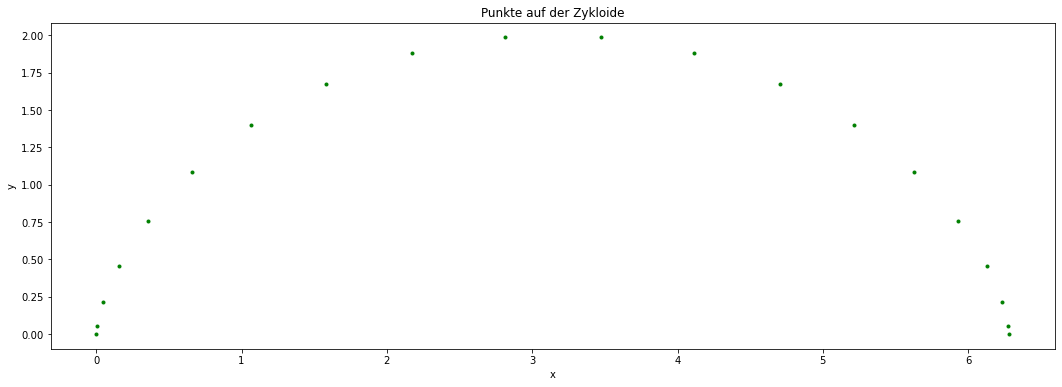

In [2]:
import matplotlib.pyplot as plt

x, y = cycloid()

fig = plt.figure(figsize=(18, 6))
plt.plot(x, y, 'go', markersize=3.0)
plt.title('Punkte auf der Zykloide')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Statt der Punkte einen Polygonzug auszugeben ist jetzt einfach. Wir verändern die Option für die Funktion *plt.plot*. Sinnvoll ist es sicher auch mehr Punkte zu berechnen, damit wir den Eindruck einer Parameterkurve erhalten und nicht nur einen groben Polygonzug zu sehen. Und wir geben mehrere Zyklen der Zykloide aus.

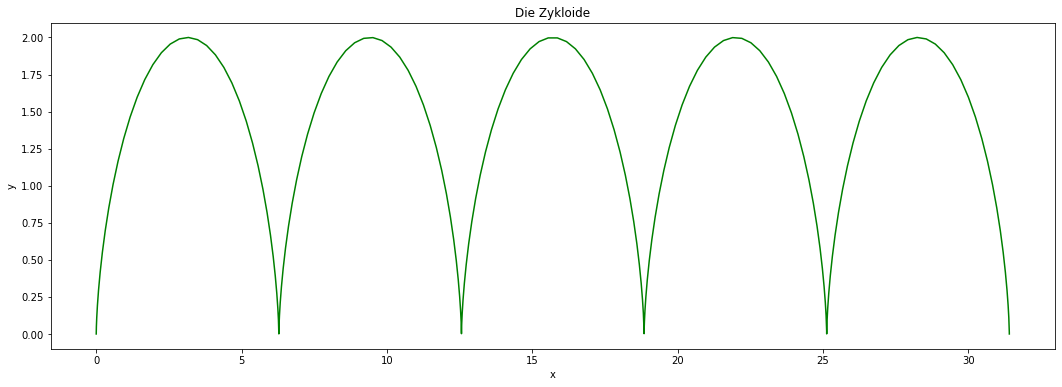

In [3]:
x, y = cycloid(n=200, b = 10.0*np.pi)

fig = plt.figure(figsize=(18, 6))
plt.plot(x, y, 'g-', markersize=3.0)
plt.title('Die Zykloide')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Ausgabe von Vektoren mit arrow
In Matplotlib gibt es die Funktion *arrow*, mit der wir Vektoren ausgeben können. Dazu übergeben wir den Anfangs- und den Endpunkt des Vektors. Die Vektoren dazu berechnen wir zum Beispiel mit der Funktion *cycloid_tangent*.

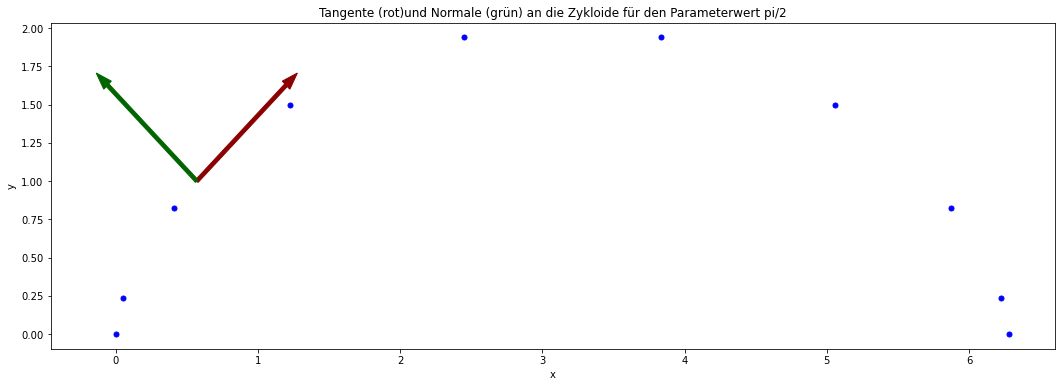

In [4]:
x, y = cycloid(n=10, b = 2.0*np.pi)
poi = cycloid_point(radius = 1.0, theta=np.pi/2.0)
tx, ty = cycloid_tangent(radius = 1.0, theta=np.pi/2.0)
nx, ny = cycloid_normal(theta=np.pi/2.0)

fig = plt.figure(figsize=(18, 6))
plt.plot(x, y, 'bo', markersize=5.0)
plt.arrow(poi[0], poi[1], 
          tx, ty,
          width=0.025,
          length_includes_head=True,
          color="darkred"
         )
plt.arrow(poi[0], poi[1], 
          nx, ny,
          width=0.025,
          length_includes_head=True,
          color="darkgreen"
         )

plt.title('Tangente (rot)und Normale (grün) an die Zykloide für den Parameterwert pi/2')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Ausgabe einer Menge von Vektoren mit Hilfe von quiver
Wenn wir mehr als eine Tangente oder Normale darstellen möchten könnten wir natürlich eine Matrix von 
Vektoren berechnen und diese an *arrow* übergeben.
Aber Matplotlib hat dafür eine eigene Funktion *quiver*, die wir auch später noch verwenden werden.
Wir berechnen eine Menge von Punkten, dort auch die Tangenten und Normalen und übergeben diese Daten an *quiver*.

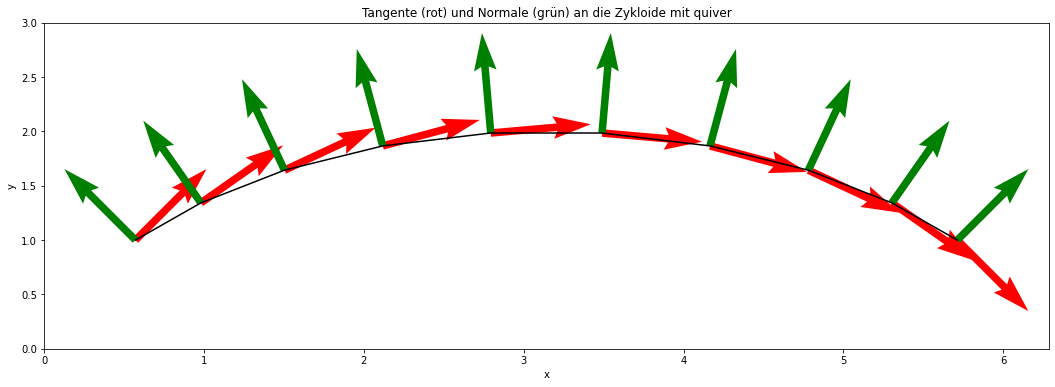

In [5]:
n = 10
a = 0.5*np.pi
b = 1.5*np.pi
theta = np.linspace(a, b, n)
radius = np.full((n, ), 1.0)
x, y = cycloid_point(radius = radius, theta=theta)

tx, ty= cycloid_tangent(radius = radius, theta=theta)
nx, ny = cycloid_normal(theta=theta)

fig = plt.figure(figsize=(18, 6))
plt.plot(x, y, 'k-')
quiverScale = 10
plt.quiver(x, y, 
           tx, ty,
           units='width',
           scale=quiverScale,
           pivot='tail',
           color='r')
plt.quiver(x, y, 
           nx, ny,
           units='width',
           scale=quiverScale,
           pivot='tail',
           color='g')

plt.xlim(0.0, 2.0*np.pi)
plt.ylim(0.0, 3.0)

plt.title('Tangente (rot) und Normale (grün) an die Zykloide mit quiver')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Plotly
Es gibt in Plotly die Möglichkeit einzelne Pfeile zu zeichnen, wenn man Annotationen verwendet. Besser ist die Möglichkeit wieder *quiver* zu verwenden, diese Funktion gibt es auch hier. Wir geben nur die Tangenten aus. Wir könnten sowohl Tangenten und Normalenvektoren ausgeben,
aber dann müssen wir die Anfangspunkte duplizieren und neue Arrays erzeugen, worauf wir verzichten.

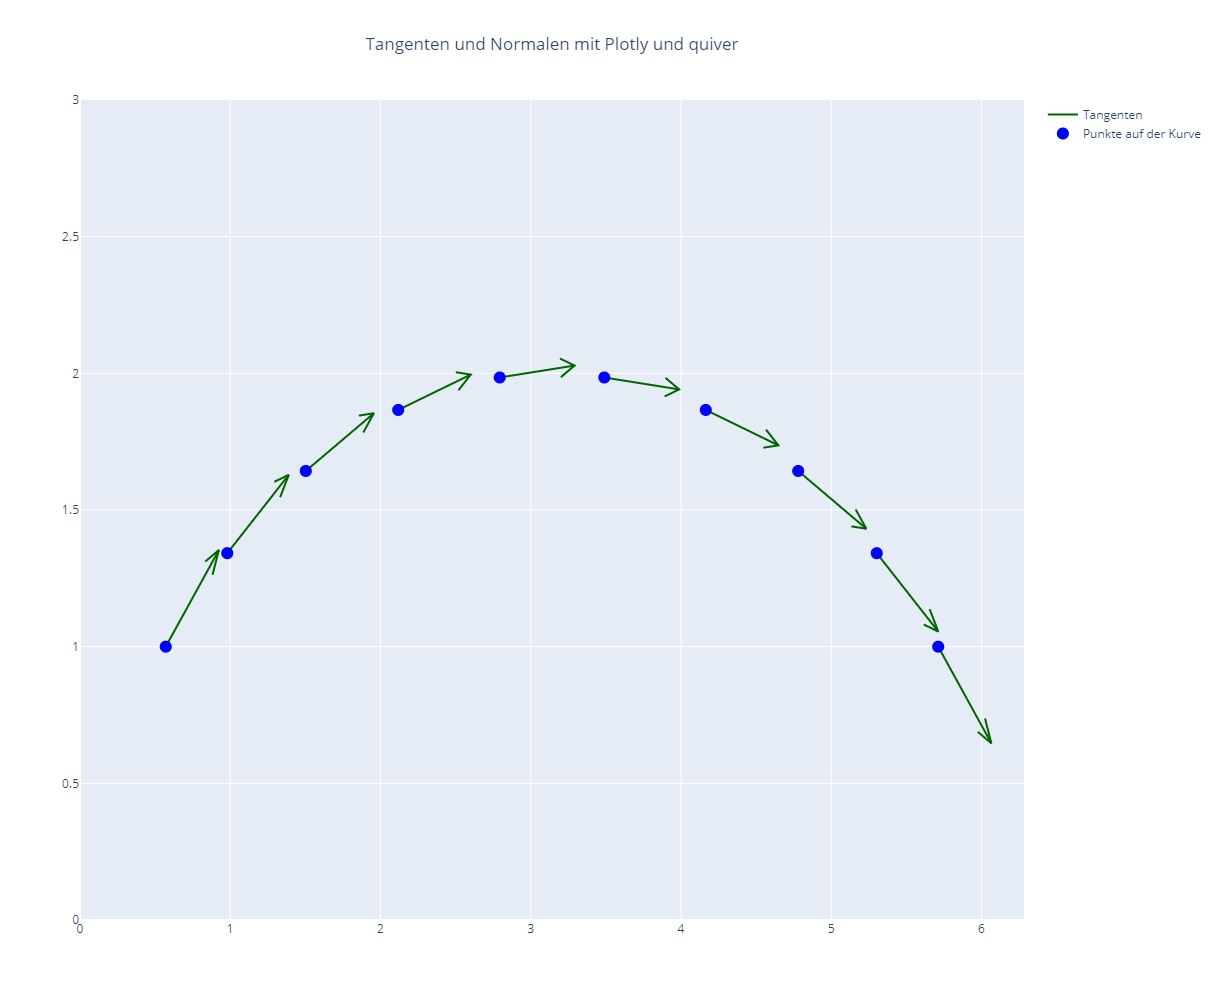

In [6]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

pio.renderers.default = 'notebook_connected+jupyterlab'

fig = ff.create_quiver(x, y,
                       tx, ty,
                       scale=0.5,
                       arrow_scale=0.2,
                       name='Tangenten'
                      )

fig.add_trace(go.Scatter(x=x, y=y,
                        mode='markers',
                        marker_size=12,
                        name='Punkte auf der Kurve'
                        )
             )

fig.update_layout(
    title=go.layout.Title(
            text="Tangenten und Normalen mit Plotly und quiver",
            xref='paper',
            x=0.5
        ),
    xaxis_range=[0.0, 2.0*np.pi],
    yaxis_range=[0.0, 3.0],
    autosize=False,
    width=1000,
    height=1000
)

fig.update_traces(
        marker=dict(color='blue'),
        line=dict(color='darkgreen')
)

fig.show()